In [7]:
#Generic
import numpy as np, pandas as pd, seaborn as sns, matplotlib.pyplot as plt,joblib
from scipy.stats import zscore

#Imputer
from sklearn.impute import SimpleImputer

#Encoder
from sklearn.preprocessing import LabelEncoder,OneHotEncoder

#PowerTransformer
from sklearn.preprocessing import PowerTransformer

#Scaler
from sklearn.preprocessing import MinMaxScaler

#TrainTestSplit
from sklearn.model_selection import train_test_split


#ClassificationModels
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier,AdaBoostClassifier,BaggingClassifier,GradientBoostingClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.naive_bayes import GaussianNB

#Optimizer
from sklearn.model_selection import GridSearchCV,cross_val_score

#Metrics
from sklearn.metrics import accuracy_score,classification_report,confusion_matrix,f1_score,average_precision_score
from sklearn.metrics import adjusted_mutual_info_score,balanced_accuracy_score,roc_curve,auc

#Deep Learning
from TensorFlow.keras.layers import Dense,Dropout
from TensorFlow.keras.models import Sequential
from TensorFlow.keras.callbacks import EarlyStopping

ModuleNotFoundError: No module named 'TensorFlow'

In [8]:
#Import Data
df=pd.read_csv('loan_prediction.csv')

In [9]:
#Check head
df.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y


In [10]:
#Check info
df.info()
#From the info we can see that there is missing data

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 614 entries, 0 to 613
Data columns (total 13 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Loan_ID            614 non-null    object 
 1   Gender             601 non-null    object 
 2   Married            611 non-null    object 
 3   Dependents         599 non-null    object 
 4   Education          614 non-null    object 
 5   Self_Employed      582 non-null    object 
 6   ApplicantIncome    614 non-null    int64  
 7   CoapplicantIncome  614 non-null    float64
 8   LoanAmount         592 non-null    float64
 9   Loan_Amount_Term   600 non-null    float64
 10  Credit_History     564 non-null    float64
 11  Property_Area      614 non-null    object 
 12  Loan_Status        614 non-null    object 
dtypes: float64(4), int64(1), object(8)
memory usage: 62.5+ KB


In [11]:
#Check null value counts
df.isna().sum()

Loan_ID               0
Gender               13
Married               3
Dependents           15
Education             0
Self_Employed        32
ApplicantIncome       0
CoapplicantIncome     0
LoanAmount           22
Loan_Amount_Term     14
Credit_History       50
Property_Area         0
Loan_Status           0
dtype: int64

In [12]:
#From the data we can see that there are maximum male so we will uimpute null values with most frequent
df['Gender'].value_counts()

Male      489
Female    112
Name: Gender, dtype: int64

In [13]:
#Impute most frequent values in Gender Column
si=SimpleImputer(strategy='most_frequent')
df['Gender']=si.fit_transform(df['Gender'].values.reshape(-1,1))

In [14]:
#Check null value counts
df.isna().sum()

Loan_ID               0
Gender                0
Married               3
Dependents           15
Education             0
Self_Employed        32
ApplicantIncome       0
CoapplicantIncome     0
LoanAmount           22
Loan_Amount_Term     14
Credit_History       50
Property_Area         0
Loan_Status           0
dtype: int64

In [15]:
#There is not much difference between two distinct values in Married column
#So we will fill null values with most frequent 'Yes'
df['Married'].value_counts()

Yes    398
No     213
Name: Married, dtype: int64

In [16]:
df['Married']=df['Married'].replace(np.nan,'Yes')

In [17]:
df['Married'].value_counts()

Yes    401
No     213
Name: Married, dtype: int64

In [18]:
df['Dependents'].value_counts()

0     345
1     102
2     101
3+     51
Name: Dependents, dtype: int64

In [19]:
#We will do EDA to check more on filling positions of Dependants
df[df['Dependents'].isna()]['Married'].value_counts()

Yes    11
No      4
Name: Married, dtype: int64

In [20]:
df[df['Married']=='No']['Dependents'].value_counts()
#As we can see for most of the people who are not married doesnot have any dependents

0     171
1      23
2       8
3+      7
Name: Dependents, dtype: int64

In [21]:

df['Dependents']=df['Dependents'].replace(np.nan,'Null')

In [22]:
def fill_dep(marr,dep):
    if dep=='Null':
        if marr=='No':
            return '0'
        else:
            return dep
    else:
        return dep

In [23]:
df['Dependents']=df.apply(lambda x:fill_dep(x['Married'],x['Dependents']),axis=1)

In [24]:
df[df['Dependents']=='Null']

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
102,LP001350,Male,Yes,Null,Graduate,No,13650,0.0,NaN,360.0,1.0,Urban,Y
104,LP001357,Male,Yes,Null,Graduate,No,3816,754.0,160.0,360.0,1.0,Urban,Y
120,LP001426,Male,Yes,Null,Graduate,No,5667,2667.0,180.0,360.0,1.0,Rural,Y
226,LP001754,Male,Yes,Null,Not Graduate,Yes,4735,0.0,138.0,360.0,1.0,Urban,N
228,LP001760,Male,Yes,Null,Graduate,No,4758,0.0,158.0,480.0,1.0,Semiurban,Y
301,LP001972,Male,Yes,Null,Not Graduate,No,2875,1750.0,105.0,360.0,1.0,Semiurban,Y
335,LP002106,Male,Yes,Null,Graduate,Yes,5503,4490.0,70.0,NaN,1.0,Semiurban,Y
346,LP002130,Male,Yes,Null,Not Graduate,No,3523,3230.0,152.0,360.0,0.0,Rural,N
435,LP002393,Female,Yes,Null,Graduate,No,10047,0.0,NaN,240.0,1.0,Semiurban,Y
517,LP002682,Male,Yes,Null,Not Graduate,No,3074,1800.0,123.0,360.0,0.0,Semiurban,N


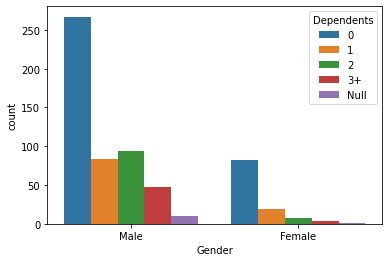

In [25]:
sns.countplot(x='Gender',data=df,hue='Dependents')
plt.show()
#From the below graph we can see that the most of the males had 0 depedents so we will impute 0 for other 
#rows too

In [26]:
df['Dependents']=df['Dependents'].replace('Null','0')

In [27]:
df['Dependents'].value_counts()

0     360
1     102
2     101
3+     51
Name: Dependents, dtype: int64

In [28]:
df.isna().sum()

Loan_ID               0
Gender                0
Married               0
Dependents            0
Education             0
Self_Employed        32
ApplicantIncome       0
CoapplicantIncome     0
LoanAmount           22
Loan_Amount_Term     14
Credit_History       50
Property_Area         0
Loan_Status           0
dtype: int64

In [29]:
df['Self_Employed'].value_counts()

No     500
Yes     82
Name: Self_Employed, dtype: int64

In [30]:
df[df['Self_Employed'].isna()]

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
11,LP001027,Male,Yes,2,Graduate,NaN,2500,1840.0,109.0,360.0,1.0,Urban,Y
19,LP001041,Male,Yes,0,Graduate,NaN,2600,3500.0,115.0,NaN,1.0,Urban,Y
24,LP001052,Male,Yes,1,Graduate,NaN,3717,2925.0,151.0,360.0,NaN,Semiurban,N
29,LP001087,Female,No,2,Graduate,NaN,3750,2083.0,120.0,360.0,1.0,Semiurban,Y
30,LP001091,Male,Yes,1,Graduate,NaN,4166,3369.0,201.0,360.0,NaN,Urban,N
95,LP001326,Male,No,0,Graduate,NaN,6782,0.0,NaN,360.0,NaN,Urban,N
107,LP001370,Male,No,0,Not Graduate,NaN,7333,0.0,120.0,360.0,1.0,Rural,N
111,LP001387,Female,Yes,0,Graduate,NaN,2929,2333.0,139.0,360.0,1.0,Semiurban,Y
114,LP001398,Male,No,0,Graduate,NaN,5050,0.0,118.0,360.0,1.0,Semiurban,Y
158,LP001546,Male,No,0,Graduate,NaN,2980,2083.0,120.0,360.0,1.0,Rural,Y


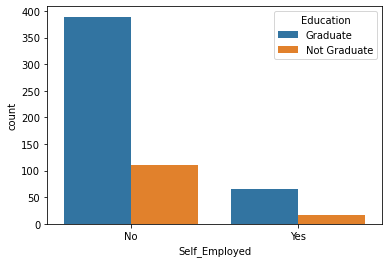

In [31]:
sns.countplot(x='Self_Employed',data=df,hue='Education')
plt.show()
#There does not seem any direct link between Self Employement so we will impute most frequent values

In [32]:
si=SimpleImputer(strategy='most_frequent')
df['Self_Employed']=si.fit_transform(df['Self_Employed'].values.reshape(-1,1))

In [33]:
df.isna().sum()

Loan_ID               0
Gender                0
Married               0
Dependents            0
Education             0
Self_Employed         0
ApplicantIncome       0
CoapplicantIncome     0
LoanAmount           22
Loan_Amount_Term     14
Credit_History       50
Property_Area         0
Loan_Status           0
dtype: int64

In [34]:
#For LoanAmount we might directly drop the rows as it might have high correlation with Loan_Status
#Hence we don't want to impute any false values
#We will consider this column after checking correlation

In [35]:
df['Loan_Amount_Term'].value_counts()
#Impute most frequent value

360.0    512
180.0     44
480.0     15
300.0     13
84.0       4
240.0      4
120.0      3
36.0       2
60.0       2
12.0       1
Name: Loan_Amount_Term, dtype: int64

In [36]:
si=SimpleImputer(strategy='most_frequent')
df['Loan_Amount_Term']=si.fit_transform(df['Loan_Amount_Term'].values.reshape(-1,1))

In [37]:
df.isna().sum()

Loan_ID               0
Gender                0
Married               0
Dependents            0
Education             0
Self_Employed         0
ApplicantIncome       0
CoapplicantIncome     0
LoanAmount           22
Loan_Amount_Term      0
Credit_History       50
Property_Area         0
Loan_Status           0
dtype: int64

In [38]:
df['Credit_History'].value_counts()

1.0    475
0.0     89
Name: Credit_History, dtype: int64

In [39]:
si=SimpleImputer(strategy='most_frequent')
df['Credit_History']=si.fit_transform(df['Credit_History'].values.reshape(-1,1))

In [40]:
#We will have to encode below columns
df.select_dtypes('object').columns.tolist()

['Loan_ID',
 'Gender',
 'Married',
 'Dependents',
 'Education',
 'Self_Employed',
 'Property_Area',
 'Loan_Status']

In [41]:
#Loan ID can be dropped directly as they are unique values
df['Loan_ID'].value_counts()

LP001207    1
LP001882    1
LP002717    1
LP001868    1
LP001497    1
           ..
LP002863    1
LP002953    1
LP002515    1
LP001871    1
LP002768    1
Name: Loan_ID, Length: 614, dtype: int64

In [42]:
df=df.drop('Loan_ID',axis=1)

In [43]:
#We will have to encode below columns
df.select_dtypes('object').columns.tolist()

['Gender',
 'Married',
 'Dependents',
 'Education',
 'Self_Employed',
 'Property_Area',
 'Loan_Status']

In [44]:
df['Gender'].value_counts()
#We can labelencode this column

Male      502
Female    112
Name: Gender, dtype: int64

In [45]:
le=LabelEncoder()
df['Gender']=le.fit_transform(df['Gender'])

In [46]:
#We will have to encode below columns
df.select_dtypes('object').columns.tolist()

['Married',
 'Dependents',
 'Education',
 'Self_Employed',
 'Property_Area',
 'Loan_Status']

In [47]:
df['Married'].value_counts()

Yes    401
No     213
Name: Married, dtype: int64

In [48]:
le=LabelEncoder()
df['Married']=le.fit_transform(df['Married'])

In [49]:
#We are not creating function for this as we will encode columns with two variable with LabelEncoder
#But columns with multiple values we will use OneHotEncoder

In [50]:
#We will have to encode below columns
df.select_dtypes('object').columns.tolist()

['Dependents', 'Education', 'Self_Employed', 'Property_Area', 'Loan_Status']

In [51]:
oe=OneHotEncoder()
df_dep=oe.fit_transform(df['Dependents'].values.reshape(-1,1)).toarray()

In [52]:
df_dep.shape

(614, 4)

In [53]:
df_dep=pd.DataFrame(df_dep,columns=['Dep_'+str(x) for x in range(df_dep.shape[1])])

In [54]:
df=pd.concat([df.drop('Dependents',axis=1),df_dep],axis=1)

In [55]:
#We will have to encode below columns
df.select_dtypes('object').columns.tolist()

['Education', 'Self_Employed', 'Property_Area', 'Loan_Status']

In [56]:
df['Education'].value_counts()

Graduate        480
Not Graduate    134
Name: Education, dtype: int64

In [57]:
le=LabelEncoder()
df['Education']=le.fit_transform(df['Education'])

In [58]:
#We will have to encode below columns
df.select_dtypes('object').columns.tolist()

['Self_Employed', 'Property_Area', 'Loan_Status']

In [59]:
df['Self_Employed'].value_counts()

No     532
Yes     82
Name: Self_Employed, dtype: int64

In [60]:
le=LabelEncoder()
df['Self_Employed']=le.fit_transform(df['Self_Employed'])

In [61]:
df['Property_Area'].value_counts()

Semiurban    233
Urban        202
Rural        179
Name: Property_Area, dtype: int64

In [62]:
le=LabelEncoder()
df['Property_Area']=le.fit_transform(df['Property_Area'])

In [63]:
le=LabelEncoder()
df['Loan_Status']=le.fit_transform(df['Loan_Status'])

In [64]:
df.corr()['Loan_Status'].sort_values(ascending=False)
#As we can see LoanAmount is not highly correlated with Loan Status so we will impute mean values for missing data

Loan_Status          1.000000
Credit_History       0.540556
Married              0.091478
Dep_2                0.062384
Property_Area        0.032112
Gender               0.017987
Dep_0               -0.003044
Self_Employed       -0.003700
ApplicantIncome     -0.004710
Loan_Amount_Term    -0.022549
Dep_3               -0.026123
LoanAmount          -0.037318
Dep_1               -0.038740
CoapplicantIncome   -0.059187
Education           -0.085884
Name: Loan_Status, dtype: float64

In [65]:
si=SimpleImputer(strategy='mean')
df['LoanAmount']=si.fit_transform(df['LoanAmount'].values.reshape(-1,1))

<AxesSubplot:xlabel='Loan_Status', ylabel='Credit_History'>

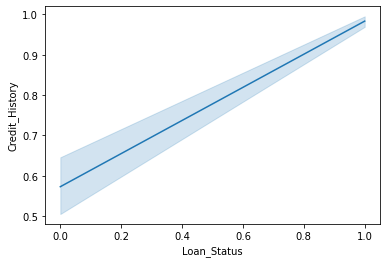

In [66]:
#As we can see there is linear relation between Loan Status and Credit History
sns.lineplot(x='Loan_Status',y='Credit_History',data=df)

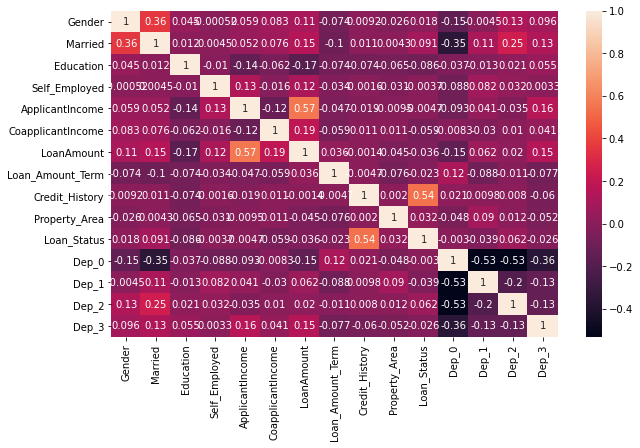

In [67]:
plt.figure(figsize=(10,6))
sns.heatmap(df.corr(),annot=True)
plt.show()

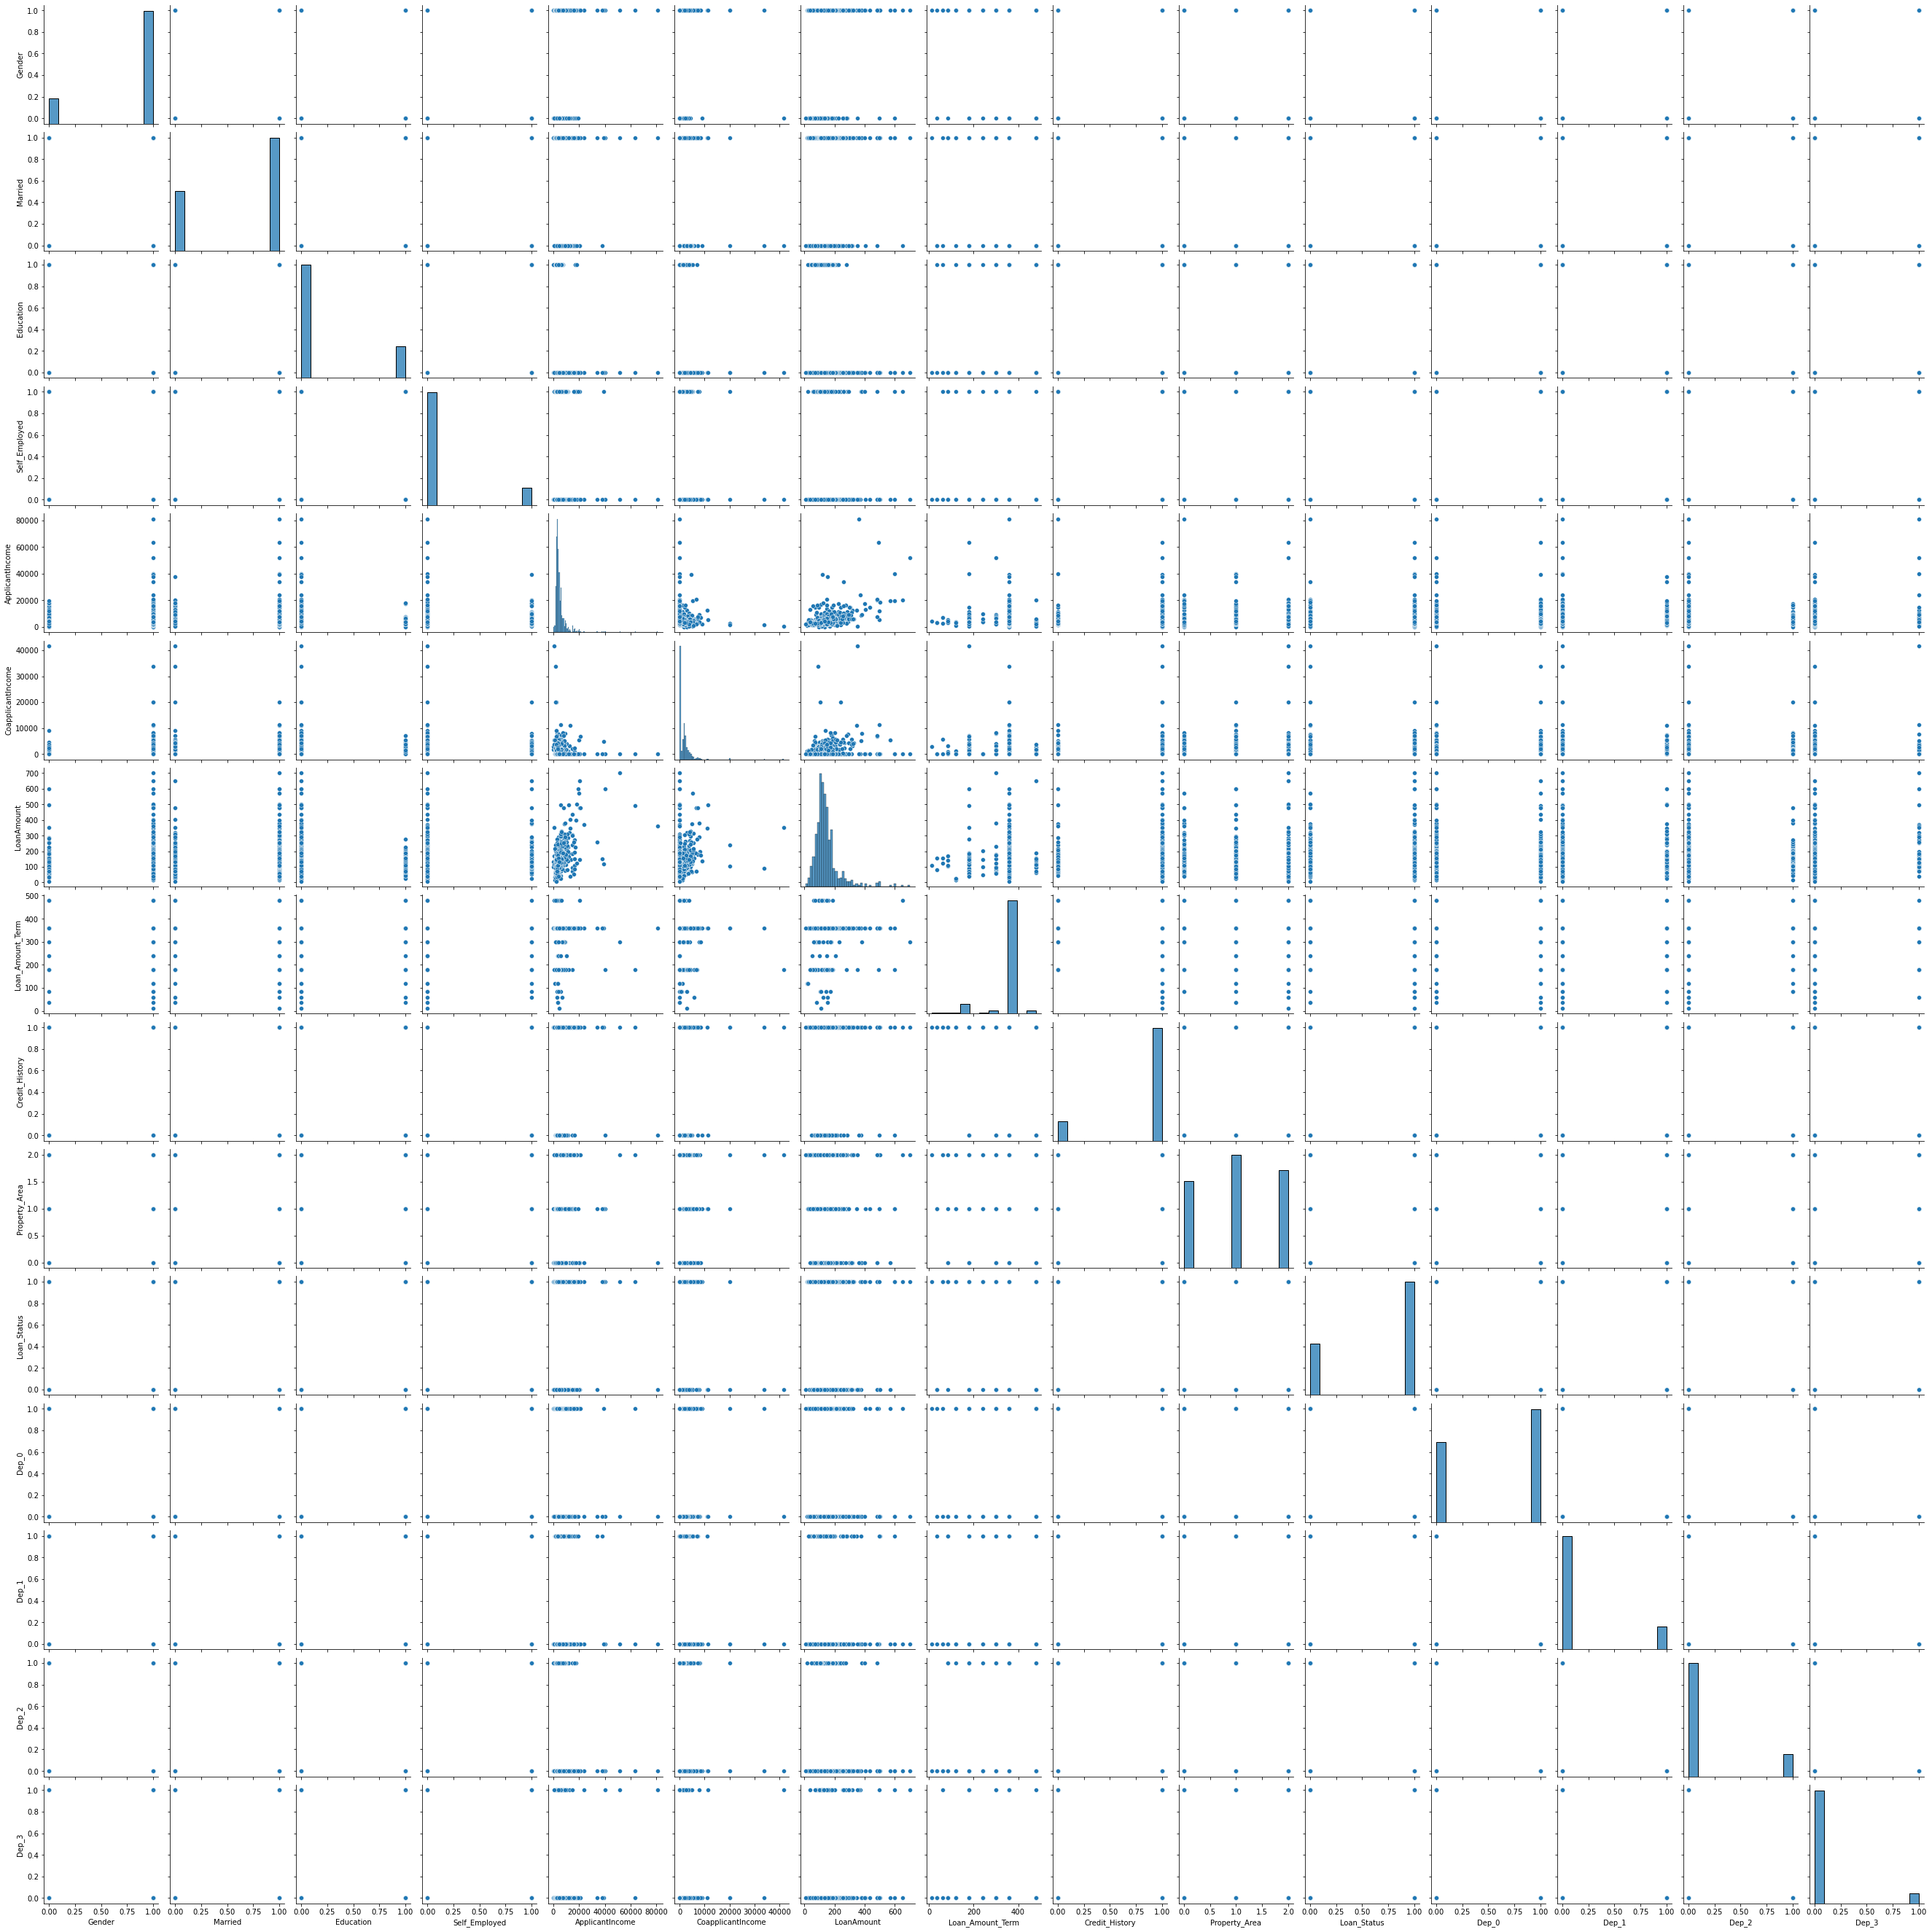

In [68]:
sns.pairplot(df)
plt.show()


In [69]:
zs=zscore(df)
df=df[((zs>-3) & (zs<3)).all(axis=1)]

In [70]:
df.shape
#At first there were 614 rows now there are 533

(533, 15)

In [71]:
#Check Skewness
df.skew()

Gender              -1.527956
Married             -0.550175
Education            1.359116
Self_Employed        2.264475
ApplicantIncome      2.195824
CoapplicantIncome    1.310820
LoanAmount           1.093335
Loan_Amount_Term    -2.138190
Credit_History      -2.006842
Property_Area       -0.080118
Loan_Status         -0.835687
Dep_0               -0.618210
Dep_1                1.720230
Dep_2                1.686243
Dep_3                0.000000
dtype: float64

In [72]:
pt=PowerTransformer()

In [73]:
for x in df.columns.drop('Loan_Status'):
    if abs(df[x].skew())>0.55:
        df.loc[:,x]=pt.fit_transform(df.loc[:,x].values.reshape(-1,1))

In [74]:
df.skew()

Gender              -1.527956
Married             -0.550175
Education            1.359116
Self_Employed        2.264475
ApplicantIncome      0.030444
CoapplicantIncome   -0.218174
LoanAmount           0.051538
Loan_Amount_Term     0.762497
Credit_History      -2.006842
Property_Area       -0.080118
Loan_Status         -0.835687
Dep_0               -0.618210
Dep_1                1.720230
Dep_2                1.686243
Dep_3                0.000000
dtype: float64

In [75]:
scale=MinMaxScaler()
X=df.drop('Loan_Status',axis=1)
y=df['Loan_Status']
X=scale.fit_transform(X)

In [76]:
#Define a function to try different train test folds
def model_select(model):
    max_score=0
    max_state=0
    for x in range(42,105):
        X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=x)
        md=model
        md.fit(X_train,y_train)
        predict=md.predict(X_test)
        fpr,tpr,thresholds=roc_curve(y_test,predict)
        acurve=auc(fpr,tpr)
#         f1=f1_score(y_test,predict)
        acc=accuracy_score(y_test,predict)
#         avg=(confusion_matrix(y_test,predict)[0,0]+confusion_matrix(y_test,predict)[1,1])/(confusion_matrix(y_test,predict)[0,1]+confusion_matrix(y_test,predict)[1,0])
        if acc>max_score:
            max_score=acc
            max_state=x
    print("Max score is {} with random state {}".format(max_score,max_state))

In [77]:
#Call the function
model_select(LogisticRegression(max_iter=4000))

Max score is 0.875 with random state 64


In [78]:
#Call the function
model_select(KNeighborsClassifier())

Max score is 0.85 with random state 79


In [79]:
#Call the function
model_select(SVC())

Max score is 0.875 with random state 64


In [80]:
#Call the function
model_select(DecisionTreeClassifier())

Max score is 0.79375 with random state 83


In [81]:
#Call the function
model_select(RandomForestClassifier())

Max score is 0.85 with random state 50


In [82]:
#Call the function
model_select(AdaBoostClassifier())

Max score is 0.8625 with random state 64


In [83]:
#Call the function
model_select(GaussianNB())

Max score is 0.86875 with random state 50


In [84]:
#Call the function
model_select(BaggingClassifier())

Max score is 0.8375 with random state 50


In [85]:
#Call the function
model_select(GradientBoostingClassifier())

Max score is 0.84375 with random state 50


In [86]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=64)
model=LogisticRegression(max_iter=4000,solver='liblinear')
model.fit(X_train,y_train)
predict=model.predict(X_test)

In [87]:
print(confusion_matrix(y_test,predict))
print()
print(classification_report(y_test,predict))

[[ 27  20]
 [  0 113]]

              precision    recall  f1-score   support

           0       1.00      0.57      0.73        47
           1       0.85      1.00      0.92       113

    accuracy                           0.88       160
   macro avg       0.92      0.79      0.82       160
weighted avg       0.89      0.88      0.86       160



In [88]:
param={'C':[0.1,0.3,0.5,0.7,0.9,1]}
gscv=GridSearchCV(LogisticRegression(max_iter=4000),param_grid=param)

In [89]:
gscv.fit(X_train,y_train)

GridSearchCV(estimator=LogisticRegression(max_iter=4000),
             param_grid={'C': [0.1, 0.3, 0.5, 0.7, 0.9, 1]})

In [90]:
gscv.best_params_

{'C': 0.3}

In [91]:
model=LogisticRegression(max_iter=4000,C=0.3)
model.fit(X_train,y_train)
predict=model.predict(X_test)

In [92]:
print(confusion_matrix(y_test,predict))
print()
print(classification_report(y_test,predict))

[[ 27  20]
 [  0 113]]

              precision    recall  f1-score   support

           0       1.00      0.57      0.73        47
           1       0.85      1.00      0.92       113

    accuracy                           0.88       160
   macro avg       0.92      0.79      0.82       160
weighted avg       0.89      0.88      0.86       160



In [93]:
joblib.dump(model,'Loan Status Logistic.obj')

['Loan Status Logistic.obj']